In [61]:
import sys
import os

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path+"utils.py")
    
import utils
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('ggplot')

In [62]:
data = pd.read_csv('../data/mnist_digits.csv')

train_size = .8
valid_size = .1

X_train, y_train, X_test, y_test, X_valid, y_valid = utils.train_test_valid_split(data, 
                                                                            train_size = train_size, 
                                                                            valid_size = valid_size, 
                                                                            random_state = 0)

print(f'Training data - {X_train.shape[1]} samples ({train_size*100}%)\n -')
print(f'Validation data - {X_valid.shape[1]} samples ({valid_size*100}%)\n -')
print(f'Training data - {X_test.shape[1]} samples ({round((1-(valid_size+train_size))*100)}%)')

Training data - 33600 samples (80.0%)
 -
Validation data - 4200 samples (10.0%)
 -
Training data - 4200 samples (10%)


In [51]:
from classes.Net import Net

net = Net(random_state = 0)

n_classes = 10

net.add_layer(784, 32, 'sigmoid')
net.add_layer(32, 10, 'sigmoid')
net.add_layer(10, n_classes, 'softmax')

learning_rate = 1
epochs = 5
batchsize = 64

net.fit(X_train, y_train, X_valid, y_valid, 
        n_classes = n_classes, 
        batchsize = batchsize, 
        epochs = epochs, 
        learning_rate = learning_rate)


Epoch 1 Iteration 0/2625
Accuracy: 0.094
-
Epoch 1 Iteration 25/2625
Accuracy: 0.283
-
Epoch 1 Iteration 50/2625
Accuracy: 0.395
-
Epoch 1 Iteration 75/2625
Accuracy: 0.582
-
Epoch 1 Iteration 100/2625
Accuracy: 0.686
-
Epoch 1 Iteration 125/2625
Accuracy: 0.762
-
Epoch 1 Iteration 150/2625
Accuracy: 0.783
-
Epoch 1 Iteration 175/2625
Accuracy: 0.787
-
Epoch 1 Iteration 200/2625
Accuracy: 0.812
-
Epoch 1 Iteration 225/2625
Accuracy: 0.84
-
Epoch 1 Iteration 250/2625
Accuracy: 0.841
-
Epoch 1 Iteration 275/2625
Accuracy: 0.843
-
Epoch 1 Iteration 300/2625
Accuracy: 0.849
-
Epoch 1 Iteration 325/2625
Accuracy: 0.855
-
Epoch 1 Iteration 350/2625
Accuracy: 0.862
-
Epoch 1 Iteration 375/2625
Accuracy: 0.875
-
Epoch 1 Iteration 400/2625
Accuracy: 0.882
-
Epoch 1 Iteration 425/2625
Accuracy: 0.879
-
Epoch 1 Iteration 450/2625
Accuracy: 0.887
-
Epoch 1 Iteration 475/2625
Accuracy: 0.885
-
Epoch 1 Iteration 500/2625
Accuracy: 0.892
-
Epoch 2 Iteration 525/2625
Accuracy: 0.895
-
Epoch 2 Iteratio

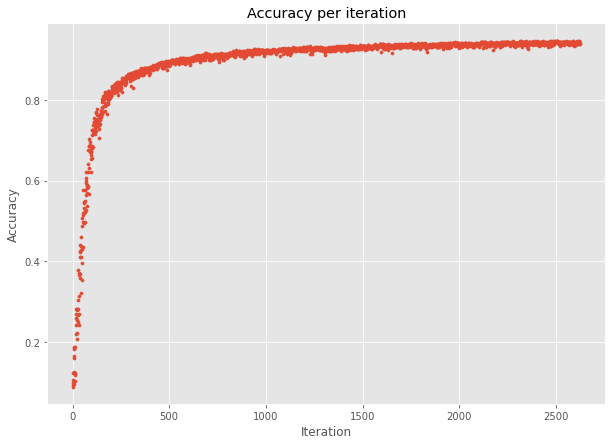

In [55]:
plt.figure(figsize = (10,7))
plt.scatter([i for i in range(len(net.acc_history))], list(net.acc_history), s = 10)
plt.title('Accuracy per iteration')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.show()

In [63]:
predictions = utils.get_all_predictions(net, X_test, y_test)
wrong_predictions = [(predicted, label, x) for predicted, label, x in predictions if predicted != label]
right_predictions = [(predicted, label, x) for predicted, label, x in predictions if predicted == label]

In [64]:
print(f'Test set accuracy: {round(net.score(X_test, y_test), 2)*100}%')

Test set accuracy: 94.0%


Prediction:  8
Label:  1


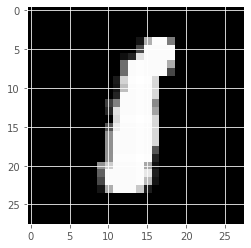

Prediction:  5
Label:  9


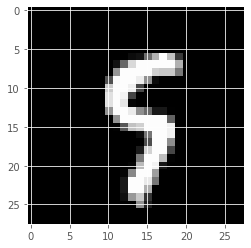

Prediction:  3
Label:  5


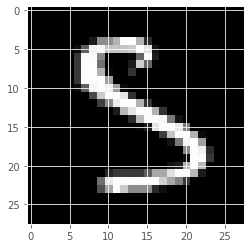

Prediction:  9
Label:  7


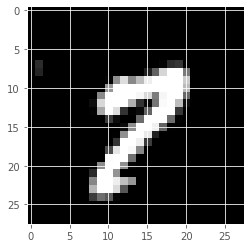

Prediction:  7
Label:  3


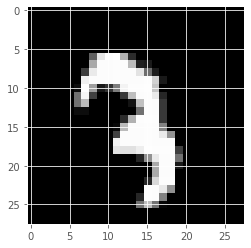

Prediction:  4
Label:  9


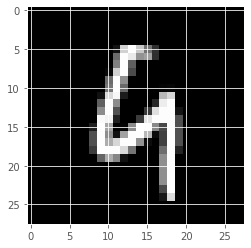

Prediction:  8
Label:  9


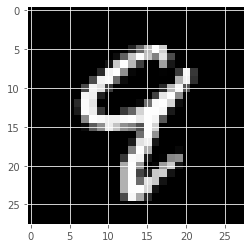

Prediction:  6
Label:  2


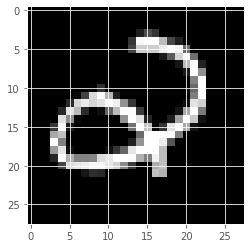

Prediction:  4
Label:  8


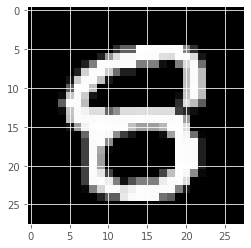

Prediction:  4
Label:  9


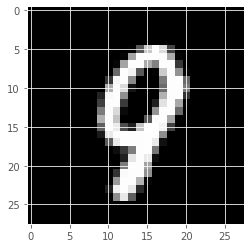

In [67]:
for prediction, label, x in wrong_predictions[:10]:
    print('Prediction: ', prediction)
    print('Label: ', label)
    plt.imshow(x.reshape((28,28)) * 255)
    plt.gray()
    plt.show()